## ENSC 813 Project

# Classifying car images in the TCC dataset

## Ashiv Hans Dhondea (301400489)

### Spring 2020. Simon Fraser University

Parameters used:

    image_dim = dimension of images resized
    
    name_brand_1 = name of first brand of car
    
    name_brand_2 = name of second brand of car

In [1]:
# Select two brands for binary classification. Two of [Audi, BMW, Honda, Lexus, Mercedes-Benz, Toyota]
name_brand_1 = 'Honda';
name_brand_2 = 'Toyota';

In [2]:
# Import the necessary packages

# numpy for linear algebra, cv2 for image processing
#  glob and os to navigate directories
import numpy as np    
import random
import glob
import os
import sys      

# matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['DejaVu Sans']})
rc('text', usetex=True)
params = {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amssymb}']}
plt.rcParams.update(params);

# pandas for excel sheet wrangling
import pandas as pd 
#import json

%matplotlib inline

In [3]:
%%javascript
IPython.notebook.kernel.execute(`notebookName = '${IPython.notebook.notebook_name}'`);

<IPython.core.display.Javascript object>

In [4]:
# Sort out utilities for file naming
# for Jupyter notebook:
# https://stackoverflow.com/questions/52691468/can-a-jupyter-notebook-find-its-own-filename
script_name = notebookName[:-6];

# All files created by this script will be named according to this:
full_name = script_name+'_'+name_brand_1+'_'+name_brand_2+ "_undersampl";
print('The full name is %s' %full_name);

The full name is nb_02_binary_classification_00_Honda_Toyota_undersampl


In [5]:
path_base = 'TCC_dataset/'
print('Available classes in the dataset are: ');
classes_list = os.listdir(path_base)
print(classes_list);

Available classes in the dataset are: 
['Audi', 'BMW', 'Honda', 'Lexus', 'Mercedes-Benz', 'Toyota']


In [6]:
# file type of interest
file_extension = "jpg";

classes_count = np.zeros([len(classes_list)],dtype=int);

# count how many examples there are for each class
for i in range(len(classes_list)):
    classes_count[i] = len(glob.glob1(path_base + classes_list[i]+"/","*."+file_extension));

classes_count_total = np.sum(classes_count);
print('Our dataset comprises of %d images.' %classes_count_total);

# calculate statistics of this dataset
classes_prob = classes_count*(1/np.sum(classes_count));
classes_mean = np.mean(classes_count);
classes_std = np.std(classes_count);

print("The mean number of examples is %.3f \n" %classes_mean);
print("The standard deviation is %.3f examples. \n" %classes_std);

Our dataset comprises of 7549 images.
The mean number of examples is 1258.167 

The standard deviation is 399.019 examples. 



In [7]:
# Choose brands for classification
chosen_classes = [name_brand_1,name_brand_2];
print('We will classify images between the following classes:');
print(chosen_classes);

# Count number of examples for each class
chosen_classes_num = np.zeros([len(chosen_classes)],dtype=int);
for i in range(len(chosen_classes)):
    chosen_classes_num[i] = classes_count[classes_list.index(chosen_classes[i])];

chosen_classes_total = np.sum(chosen_classes_num);
print('This subset consists of %d images.' %chosen_classes_total);

We will classify images between the following classes:
['Honda', 'Toyota']
This subset consists of 3059 images.


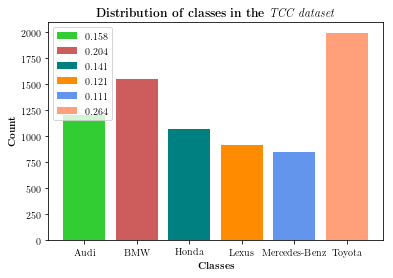

In [8]:
fig = plt.figure(1);
pos = np.arange(len(classes_list));

color_list = ['limegreen','indianred','teal','darkorange','cornflowerblue','lightsalmon'];

for index in pos:
    plt.bar(index,classes_count[index],color=color_list[index],label=r"%.3f" %(classes_prob[index]));

plt.xticks(pos,classes_list);
plt.title(r"\textbf{Distribution of classes in the} \textit{TCC dataset}",fontsize=12)
plt.xlabel(r"\textbf{Classes}")
plt.ylabel(r"\textbf{Count}")
plt.legend(loc='upper left');
plt.savefig(full_name+'_full_dataset.png');
#plt.savefig(full_name+'full_dataset.pdf');
plt.show();

The above bar graph shows that the dataset is unbalanced.

Ideally, we would prefer to have a balanced dataset, that is, each brand should be present 1/6th of the time.

Clearly, some brands, such as *Toyota* with 26.4%, are overrepresented while others are underrepresented, such as *Mercedes-Benz* with 11.1%.

We balance the dataset by undersampling the overrepresented classes.

We randomly choose which particular example from the overrepresented classes will be chosen and which will be excluded from the dataset used for learning.

In [9]:
# Find the least represented class and undersample the other class
smallest_count_chosen = np.min(chosen_classes_num);
smallest_count_chosen_index = np.argmin(chosen_classes_num);
smallest_count_chosen_id = chosen_classes[smallest_count_chosen_index];
print('The least represented class is %s which has %d examples.' %(smallest_count_chosen_id,smallest_count_chosen));

print('We will undersample the other class so that we end up with a balanced dataset')

The least represented class is Honda which has 1067 examples.
We will undersample the other class so that we end up with a balanced dataset


In [10]:
# Create list of file names for each class to undersample
# Choose randomly in this list to obtain the required number of examples

overall_files_list = [];

for i in range(0,len(chosen_classes)):
    files_list = [];
    for file in glob.glob(path_base+"/"+chosen_classes[i]+"/*."+file_extension):
        index_for_filename = file.index('\\');
        files_list.append(file[index_for_filename+1:]);
    random.shuffle(files_list);
    overall_files_list.extend(files_list[:smallest_count_chosen]);
            
df_list = pd.DataFrame(overall_files_list);
df_list.to_excel(full_name+'.xlsx', engine='xlsxwriter')
print('Examples per class:')  
print(len(overall_files_list)/len(chosen_classes));

Examples per class:
1067.0


We have created an Excel worksheet to save the names of all files which will be used for learning.

We now verify that we created this worksheet correctly.

In [11]:
# Load excel sheet and verify the distribution of classes
# Read the excel file and pick out the images which are relevant to this script
worksheet_name = 'Sheet1';
list_file = full_name+'.xlsx';
data_frames = pd.read_excel(list_file, sheet_name=worksheet_name);
curated_file_list = np.asarray(data_frames.values.tolist());

In [12]:
curated_file_list_cleaned = [None]*len(curated_file_list);
curated_file_list_classes = [None]*len(curated_file_list);
for k in range(len(curated_file_list)):
    filename = str(curated_file_list[k]);
    curated_file_list_cleaned[k] = filename[2:-2];
    curated_file_list_classes[k] = filename[2:].split("_")[0];

# Find unique classes and their frequencies
curated_brands, curated_brands_freq = np.unique(curated_file_list_classes,return_counts=True);

# Compute stats for the undersampled dataset
curated_brands_prob = np.asarray(curated_brands_freq,dtype=np.float64)*(1/np.sum(np.asarray(curated_brands_freq,dtype=np.float64)));
curated_brands_mean = np.mean(np.asarray(curated_brands_freq,dtype=np.float64));
curated_brands_std = np.std(np.asarray(curated_brands_freq,dtype=np.float64));

print('For the undersampled dataset:')
print("The mean number of examples is %.3f " %curated_brands_mean);
print("The standard deviation is %.3f examples." %curated_brands_std);

For the undersampled dataset:
The mean number of examples is 1067.000 
The standard deviation is 0.000 examples.


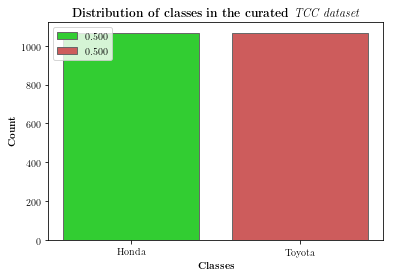

In [13]:
# Plot the selected dataset (after undersampling)
fig = plt.figure(2);
pos = np.arange(len(curated_brands));

color_list = ['limegreen','indianred','teal','darkorange','cornflowerblue','lightsalmon'];

for index in pos:
    plt.bar(index,curated_brands_freq[index],color=color_list[index],edgecolor='dimgray',label=r"%.3f" %(curated_brands_prob[index]));

plt.xticks(pos,curated_brands);
plt.title(r"\textbf{Distribution of classes in the curated} \textit{TCC dataset}",fontsize=12)
plt.xlabel(r"\textbf{Classes}")
plt.ylabel(r"\textbf{Count}")
plt.legend(loc='upper left');
plt.savefig(full_name+'_balanced_dataset.png');
#plt.savefig(full_name+'balanced_dataset.pdf');
plt.show();

As can be seen in the above figure, the two brands are equally distributed in the curated dataset.

This helps to avoid issues when working on the learning task.